In [1]:
import cv2
import numpy as np 
import stereo_setting as stset

%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

In [2]:
calib_dir = "./basler_calib_params_2022/"
orig_l_dir = "./basler_L_data_2022/20_L_.png"
orig_r_dir = "./basler_R_data_2022/20_R_.png"

In [3]:
def rectify_images(orig_l, orig_r, calib_dir):
    vert, hori = orig_l.shape[:2]
    left_stereo_map, right_stereo_map, _ = stset.st_maps(calib_dir, (hori, vert))
    rect_l, rect_r = stset.st_rectify(orig_l, orig_r, left_stereo_map, right_stereo_map)
    
    return rect_l, rect_r
#enddef

In [10]:
orig_l, orig_r = cv2.imread(orig_l_dir, 0), cv2.imread(orig_r_dir, 0)
rect_l, rect_r = rectify_images(orig_l, orig_r, calib_dir)

vert, hori = rect_l.shape[:2]
resize_scale = 3
scaled = (int(hori/resize_scale), int(vert/resize_scale))

cv2.imshow("rect_l", cv2.resize(rect_l, scaled))
cv2.imshow("rect_r", cv2.resize(rect_r, scaled))
cv2.waitKey(0)
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


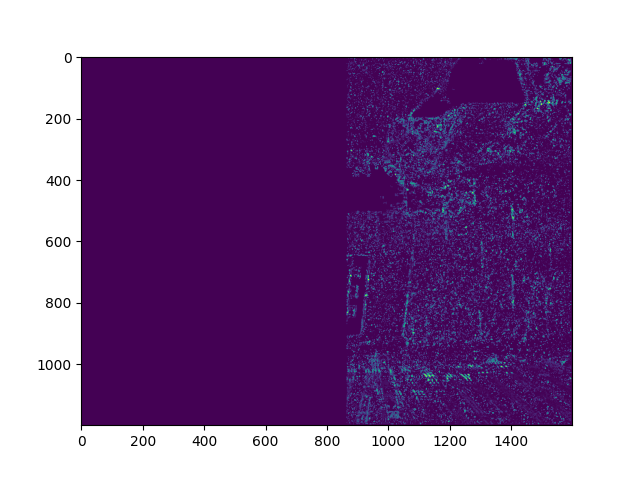

In [31]:
stereo = cv2.StereoBM_create(numDisparities=16*54, blockSize=7)
disparity = stereo.compute(rect_l, rect_r)

plt.imshow(disparity)
plt.show()